# Deep Learning for NLP - Creating a chatbot

In [1]:
#Library Imports
import pickle
import numpy as np

In [2]:
#retrieve training data
with open('train_qa.txt', 'rb') as f:
    train_data = pickle.load(f)

In [3]:
#retrieve test data
with open('test_qa.txt', 'rb') as f:
    test_data = pickle.load(f)

In [4]:
#Number of training instances
len(train_data)

10000

In [5]:
#Number of test instances
len(test_data)

1000

In [6]:
#Example of one of the instances
train_data[10]

(['Sandra',
  'went',
  'back',
  'to',
  'the',
  'hallway',
  '.',
  'Sandra',
  'moved',
  'to',
  'the',
  'office',
  '.'],
 ['Is', 'Sandra', 'in', 'the', 'office', '?'],
 'yes')

In [7]:
' '.join(train_data[10][0])

'Sandra went back to the hallway . Sandra moved to the office .'

In [8]:
' '.join(train_data[10][1])

'Is Sandra in the office ?'

In [9]:
train_data[10][2]

'yes'

In [10]:
#First we need to create a vocabulary with our data
#For this we will use the training data only to - On the video it uses both
#train and test 
#Might have to use training and test later, as the dataset has very
#few words

In [11]:
#First we will build a set of all the words in the dataset:
vocab = set()
for story, question, answer in train_data:
    vocab = vocab.union(set(story)) #Set returns unique words in the sentence
                                    #Union returns the unique common elements from a two sets
    vocab = vocab.union(set(question))

In [12]:
vocab.add('no')
vocab.add('yes')

In [13]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [14]:
#Calculate len and add 1 for Keras placeholder - Placeholders are used to feed in the data to the network. 
#They need a data type, and have optional shape arguements.
#They will be empty at first, and then the data will get fed into the placeholder
vocab_len = len(vocab) + 1

In [15]:
vocab_len

38

In [16]:
#Now we are going to calculate the longest story and the longest question
#We need this for the Keras pad sequences. 
#Keras training layers expect all of the input to have the same length, so 
#we need to pad 
all_data = test_data + train_data

In [17]:
all_story_lens = [len(data[0]) for data in all_data]

In [18]:
max_story_len = (max(all_story_lens))

In [19]:
max_question_len = max([len(data[1]) for data in all_data])

## Vectorizing the data

First, we will go through a manual process of how to vectorize the data, and then we will create a function that does this automatically for us. 

In [20]:
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

C:\Users\jaime\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [21]:
#Create an instance of the tokenizer object:
tokenizer = Tokenizer(filters = [])
tokenizer.fit_on_texts(vocab)

In [22]:
#Dictionary that maps every word in our vocab to an index
# It has been automatically lowercased
#This tokenizer can give different indexes for different words depending on when we run it
tokenizer.word_index

{'grabbed': 1,
 'got': 2,
 'bedroom': 3,
 'dropped': 4,
 'back': 5,
 'put': 6,
 'mary': 7,
 'garden': 8,
 'hallway': 9,
 'sandra': 10,
 'took': 11,
 'in': 12,
 'down': 13,
 'office': 14,
 'up': 15,
 'went': 16,
 'to': 17,
 'discarded': 18,
 'journeyed': 19,
 'is': 20,
 'picked': 21,
 'there': 22,
 'left': 23,
 'bathroom': 24,
 'travelled': 25,
 'apple': 26,
 'yes': 27,
 'moved': 28,
 '?': 29,
 'no': 30,
 'daniel': 31,
 'kitchen': 32,
 'john': 33,
 'football': 34,
 'the': 35,
 '.': 36,
 'milk': 37}

In [23]:
#Tokenize the stories, questions and answers:
train_story_text = []
train_question_text = []
train_answers = []

In [24]:
#Separating each of the elements
for story,question,answer in train_data:
    train_story_text.append(story)
    train_question_text.append(question) 
    train_answers.append(answer)
    

In [25]:
#Coverting the text into the indexes 
train_story_seq = tokenizer.texts_to_sequences(train_story_text)

In [26]:
#Create a function for vectorizing the stories, questions and answers:
def vectorize_stories(data,word_index = tokenizer.word_index, max_story_len = max_story_len, max_question_len = max_question_len):
    #vectorized stories:
    X = []
    #vectorized questions:
    Xq = []
    #vectorized answers:
    Y = []
    
    for story, question, answer in data:
        #Getting indexes for each word in the story
        x = [word_index[word.lower()] for word in story]
        #Getting indexes for each word in the story
        xq = [word_index[word.lower()] for word in question]
        #For the answers
        y = np.zeros(len(word_index) + 1) #Index 0 Reserved when padding the sequences
        y[word_index[answer]] = 1
        
        X.append(x)
        Xq.append(xq)
        Y.append(y)
        
    #Now we have to pad these sequences:
    return(pad_sequences(X,maxlen=max_story_len), pad_sequences(Xq, maxlen=max_question_len), np.array(Y))
        

In [27]:
inputs_train, questions_train, answers_train = vectorize_stories(train_data)

In [28]:
inputs_test, questions_test, answers_test = vectorize_stories(test_data)

In [29]:
inputs_train[0]

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  7, 28, 17, 35, 24, 36, 10, 19, 17,
       35,  3, 36])

In [30]:
train_story_text[0]

['Mary',
 'moved',
 'to',
 'the',
 'bathroom',
 '.',
 'Sandra',
 'journeyed',
 'to',
 'the',
 'bedroom',
 '.']

In [31]:
train_story_seq[0]

[7, 28, 17, 35, 24, 36, 10, 19, 17, 35, 3, 36]

## Building the Network

In [30]:
#Imports
from keras.models import Sequential, Model
from keras.layers.embeddings import Embedding
from keras.layers import Input, Activation, Dense, Permute, Dropout, add, dot, concatenate, LSTM

In [31]:
# We need to create the placeholders 
#The Input function is used to create a keras tensor
#PLACEHOLDER shape = (max_story_len,batch_size)
#These are our placeholder for the inputs, ready to recieve batches of the stories and the questions
input_sequence = Input((max_story_len,)) #As we dont know batch size yet
question = Input((max_question_len,))

In [32]:
#Create input encoder M:
input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim=vocab_len,output_dim = 64)) #From paper
input_encoder_m.add(Dropout(0.3))

#Outputs: (Samples, story_maxlen,embedding_dim) -- Gives a list of the lenght of the samples where each item has the
#lenght of the max story lenght and every word is embedded in the embbeding dimension

In [33]:
#Create input encoder C:
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim=vocab_len,output_dim = max_question_len)) #From paper
input_encoder_c.add(Dropout(0.3))

#Outputs: (samples, story_maxlen, max_question_len)

In [34]:
#Create question encoder:
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim=vocab_len,output_dim = 64,input_length=max_question_len)) #From paper
question_encoder.add(Dropout(0.3))

#Outputs: (samples, question_maxlen, embedding_dim)

In [35]:
#Now lets encode the sequences, passing the placeholders into our encoders:
input_encoded_m = input_encoder_m(input_sequence)
input_encoded_c = input_encoder_c(input_sequence)
question_encoded = question_encoder(question)

In [36]:
#Use dot product to compute similarity between input encoded m and question 
#Like in the paper:
match = dot([input_encoded_m,question_encoded], axes = (2,2))
match = Activation('softmax')(match)

In [37]:
#For the response we want to add this match with the ouput of input_encoded_c
response = add([match,input_encoded_c])
response = Permute((2,1))(response) #Permute Layer: permutes dimensions of input

In [38]:
#Once we have the response we can concatenate it with the question encoded:
answer = concatenate([response, question_encoded])

In [39]:
answer

<tf.Tensor 'concatenate_1/concat:0' shape=(?, 6, 220) dtype=float32>

In [40]:
# Reduce the answer tensor with a RNN (LSTM)
answer = LSTM(32)(answer)

In [41]:
#Regularization with dropout:
answer = Dropout(0.5)(answer)
#Output layer:
answer = Dense(vocab_len)(answer) #Output shape: (Samples, Vocab_size) #Yes or no and all 0s

In [42]:
#Now we need to output a probability distribution for the vocab, using softmax:
answer = Activation('softmax')(answer)

In [43]:
#Now we build the final model:
model = Model([input_sequence,question], answer)

In [44]:
model.compile(optimizer='rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
#Categorical instead of binary cross entropy as because of the way we are training
#we could actually see any of the words from the vocab as output
#however, we should only see yes or no

In [45]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 156)          0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 6)            0                                            
__________________________________________________________________________________________________
sequential_1 (Sequential)       multiple             2432        input_1[0][0]                    
__________________________________________________________________________________________________
sequential_3 (Sequential)       (None, 6, 64)        2432        input_2[0][0]                    
__________________________________________________________________________________________________
dot_1 (Dot

## Training and testing the model

In [71]:
history = model.fit([inputs_train,questions_train],answers_train, batch_size = 32, epochs = 1000, validation_data = ([inputs_test,questions_test],answers_test))

Train on 10000 samples, validate on 1000 samples
Epoch 1/1000
10000/10000 [==============================] - 3s 294us/step - loss: 0.6712 - acc: 0.5812 - val_loss: 0.6591 - val_acc: 0.6410
Epoch 2/1000
10000/10000 [==============================] - 3s 298us/step - loss: 0.6466 - acc: 0.6206 - val_loss: 0.6240 - val_acc: 0.6680
Epoch 3/1000
10000/10000 [==============================] - 3s 295us/step - loss: 0.6258 - acc: 0.6455 - val_loss: 0.6041 - val_acc: 0.6680
Epoch 4/1000
10000/10000 [==============================] - 3s 300us/step - loss: 0.6108 - acc: 0.6665 - val_loss: 0.5749 - val_acc: 0.6930
Epoch 5/1000
10000/10000 [==============================] - 4s 426us/step - loss: 0.5781 - acc: 0.7000 - val_loss: 0.5370 - val_acc: 0.7290
Epoch 6/1000
10000/10000 [==============================] - 4s 416us/step - loss: 0.5525 - acc: 0.7190 - val_loss: 0.5079 - val_acc: 0.7480
Epoch 7/1000
10000/10000 [==============================] - 4s 415us/step - loss: 0.5284 - acc: 0.7427 - val_lo

Epoch 59/1000
10000/10000 [==============================] - 4s 395us/step - loss: 0.2892 - acc: 0.8735 - val_loss: 0.3543 - val_acc: 0.8330
Epoch 60/1000
10000/10000 [==============================] - 4s 392us/step - loss: 0.2868 - acc: 0.8753 - val_loss: 0.3536 - val_acc: 0.8360
Epoch 61/1000
10000/10000 [==============================] - 4s 409us/step - loss: 0.2882 - acc: 0.8759 - val_loss: 0.3549 - val_acc: 0.8300
Epoch 62/1000
10000/10000 [==============================] - 4s 393us/step - loss: 0.2848 - acc: 0.8793 - val_loss: 0.3564 - val_acc: 0.8330
Epoch 63/1000
10000/10000 [==============================] - 4s 393us/step - loss: 0.2875 - acc: 0.8761 - val_loss: 0.3732 - val_acc: 0.8310
Epoch 64/1000
10000/10000 [==============================] - 4s 390us/step - loss: 0.2857 - acc: 0.8753 - val_loss: 0.3737 - val_acc: 0.8290
Epoch 65/1000
10000/10000 [==============================] - 4s 392us/step - loss: 0.2791 - acc: 0.8798 - val_loss: 0.3685 - val_acc: 0.8250
Epoch 66/1000

Epoch 117/1000
10000/10000 [==============================] - 4s 392us/step - loss: 0.2414 - acc: 0.8972 - val_loss: 0.4189 - val_acc: 0.8210
Epoch 118/1000
10000/10000 [==============================] - 4s 395us/step - loss: 0.2358 - acc: 0.9029 - val_loss: 0.4508 - val_acc: 0.8280
Epoch 119/1000
10000/10000 [==============================] - 4s 390us/step - loss: 0.2385 - acc: 0.9033 - val_loss: 0.4806 - val_acc: 0.8190
Epoch 120/1000
10000/10000 [==============================] - 4s 390us/step - loss: 0.2405 - acc: 0.9034 - val_loss: 0.4501 - val_acc: 0.8200
Epoch 121/1000
10000/10000 [==============================] - 4s 395us/step - loss: 0.2313 - acc: 0.9086 - val_loss: 0.4638 - val_acc: 0.8310
Epoch 122/1000
10000/10000 [==============================] - 4s 395us/step - loss: 0.2291 - acc: 0.9010 - val_loss: 0.4599 - val_acc: 0.8170
Epoch 123/1000
10000/10000 [==============================] - 4s 394us/step - loss: 0.2340 - acc: 0.9046 - val_loss: 0.4407 - val_acc: 0.8180
Epoch 

Epoch 175/1000
10000/10000 [==============================] - 4s 419us/step - loss: 0.1913 - acc: 0.9226 - val_loss: 0.5413 - val_acc: 0.8170
Epoch 176/1000
10000/10000 [==============================] - 4s 425us/step - loss: 0.1891 - acc: 0.9255 - val_loss: 0.5877 - val_acc: 0.8160
Epoch 177/1000
10000/10000 [==============================] - 5s 455us/step - loss: 0.1879 - acc: 0.9279 - val_loss: 0.5658 - val_acc: 0.8200
Epoch 178/1000
10000/10000 [==============================] - 5s 465us/step - loss: 0.1881 - acc: 0.9259 - val_loss: 0.5828 - val_acc: 0.8130
Epoch 179/1000
10000/10000 [==============================] - 4s 424us/step - loss: 0.1895 - acc: 0.9228 - val_loss: 0.5495 - val_acc: 0.8140
Epoch 180/1000
10000/10000 [==============================] - 4s 425us/step - loss: 0.1874 - acc: 0.9283 - val_loss: 0.5871 - val_acc: 0.8220
Epoch 181/1000
10000/10000 [==============================] - 4s 406us/step - loss: 0.1856 - acc: 0.9268 - val_loss: 0.5864 - val_acc: 0.8210
Epoch 

Epoch 233/1000
10000/10000 [==============================] - 4s 407us/step - loss: 0.1464 - acc: 0.9439 - val_loss: 0.6841 - val_acc: 0.8230
Epoch 234/1000
10000/10000 [==============================] - 4s 405us/step - loss: 0.1409 - acc: 0.9451 - val_loss: 0.6482 - val_acc: 0.8240
Epoch 235/1000
10000/10000 [==============================] - 4s 417us/step - loss: 0.1411 - acc: 0.9455 - val_loss: 0.7166 - val_acc: 0.8200
Epoch 236/1000
10000/10000 [==============================] - 4s 422us/step - loss: 0.1397 - acc: 0.9469 - val_loss: 0.7026 - val_acc: 0.8240
Epoch 237/1000
10000/10000 [==============================] - 4s 417us/step - loss: 0.1500 - acc: 0.9452 - val_loss: 0.7058 - val_acc: 0.8120
Epoch 238/1000
10000/10000 [==============================] - 4s 404us/step - loss: 0.1396 - acc: 0.9474 - val_loss: 0.6364 - val_acc: 0.8170
Epoch 239/1000
10000/10000 [==============================] - 4s 408us/step - loss: 0.1459 - acc: 0.9449 - val_loss: 0.6951 - val_acc: 0.8150
Epoch 

Epoch 348/1000
10000/10000 [==============================] - 4s 402us/step - loss: 0.0979 - acc: 0.9696 - val_loss: 0.8057 - val_acc: 0.8090
Epoch 349/1000
10000/10000 [==============================] - 4s 404us/step - loss: 0.0966 - acc: 0.9671 - val_loss: 0.9107 - val_acc: 0.8160
Epoch 350/1000
10000/10000 [==============================] - 4s 415us/step - loss: 0.0930 - acc: 0.9688 - val_loss: 0.9503 - val_acc: 0.8170
Epoch 351/1000
10000/10000 [==============================] - 4s 410us/step - loss: 0.0943 - acc: 0.9691 - val_loss: 0.9263 - val_acc: 0.8020
Epoch 352/1000
10000/10000 [==============================] - 4s 398us/step - loss: 0.0914 - acc: 0.9670 - val_loss: 0.9329 - val_acc: 0.8090
Epoch 353/1000
10000/10000 [==============================] - 4s 404us/step - loss: 0.0833 - acc: 0.9706 - val_loss: 0.9290 - val_acc: 0.8160
Epoch 354/1000
10000/10000 [==============================] - 4s 398us/step - loss: 0.0902 - acc: 0.9672 - val_loss: 0.9244 - val_acc: 0.8180
Epoch 

Epoch 406/1000
10000/10000 [==============================] - 5s 524us/step - loss: 0.0802 - acc: 0.9745 - val_loss: 0.9236 - val_acc: 0.8120
Epoch 407/1000
10000/10000 [==============================] - 5s 479us/step - loss: 0.0836 - acc: 0.9741 - val_loss: 0.9318 - val_acc: 0.8280
Epoch 408/1000
10000/10000 [==============================] - 5s 472us/step - loss: 0.0760 - acc: 0.9764 - val_loss: 0.9170 - val_acc: 0.8290
Epoch 409/1000
10000/10000 [==============================] - 4s 446us/step - loss: 0.0820 - acc: 0.9742 - val_loss: 0.8652 - val_acc: 0.8200
Epoch 410/1000
10000/10000 [==============================] - 4s 444us/step - loss: 0.0684 - acc: 0.9776 - val_loss: 1.0159 - val_acc: 0.8220
Epoch 411/1000
10000/10000 [==============================] - 4s 435us/step - loss: 0.0735 - acc: 0.9742 - val_loss: 0.9446 - val_acc: 0.8180
Epoch 412/1000
10000/10000 [==============================] - 4s 430us/step - loss: 0.0784 - acc: 0.9747 - val_loss: 0.9169 - val_acc: 0.8190
Epoch 

Epoch 464/1000
10000/10000 [==============================] - 4s 409us/step - loss: 0.0632 - acc: 0.9800 - val_loss: 1.0162 - val_acc: 0.8310
Epoch 465/1000
10000/10000 [==============================] - 4s 407us/step - loss: 0.0731 - acc: 0.9777 - val_loss: 0.9904 - val_acc: 0.8290
Epoch 466/1000
10000/10000 [==============================] - 4s 405us/step - loss: 0.0685 - acc: 0.9797 - val_loss: 1.0326 - val_acc: 0.8190
Epoch 467/1000
10000/10000 [==============================] - 4s 415us/step - loss: 0.0633 - acc: 0.9809 - val_loss: 1.0301 - val_acc: 0.8290
Epoch 468/1000
10000/10000 [==============================] - 4s 420us/step - loss: 0.0693 - acc: 0.9767 - val_loss: 1.0321 - val_acc: 0.8210
Epoch 469/1000
10000/10000 [==============================] - 4s 408us/step - loss: 0.0647 - acc: 0.9797 - val_loss: 1.0509 - val_acc: 0.8260
Epoch 470/1000
10000/10000 [==============================] - 4s 412us/step - loss: 0.0628 - acc: 0.9783 - val_loss: 1.1414 - val_acc: 0.8400
Epoch 

Epoch 522/1000
10000/10000 [==============================] - 4s 407us/step - loss: 0.0571 - acc: 0.9834 - val_loss: 1.0070 - val_acc: 0.8310
Epoch 523/1000
10000/10000 [==============================] - 4s 409us/step - loss: 0.0553 - acc: 0.9824 - val_loss: 1.1108 - val_acc: 0.8360
Epoch 524/1000
10000/10000 [==============================] - 4s 409us/step - loss: 0.0664 - acc: 0.9814 - val_loss: 0.9401 - val_acc: 0.8300
Epoch 525/1000
10000/10000 [==============================] - 4s 427us/step - loss: 0.0664 - acc: 0.9826 - val_loss: 1.0491 - val_acc: 0.8310
Epoch 526/1000
10000/10000 [==============================] - 4s 422us/step - loss: 0.0543 - acc: 0.9831 - val_loss: 1.0202 - val_acc: 0.8340
Epoch 527/1000
10000/10000 [==============================] - 4s 429us/step - loss: 0.0598 - acc: 0.9827 - val_loss: 1.0909 - val_acc: 0.8330
Epoch 528/1000
10000/10000 [==============================] - 4s 411us/step - loss: 0.0632 - acc: 0.9821 - val_loss: 1.0536 - val_acc: 0.8320
Epoch 

Epoch 580/1000
10000/10000 [==============================] - 4s 439us/step - loss: 0.0595 - acc: 0.9842 - val_loss: 1.0344 - val_acc: 0.8390
Epoch 581/1000
10000/10000 [==============================] - 4s 441us/step - loss: 0.0510 - acc: 0.9849 - val_loss: 1.2176 - val_acc: 0.8350
Epoch 582/1000
10000/10000 [==============================] - 4s 448us/step - loss: 0.0586 - acc: 0.9830 - val_loss: 1.1563 - val_acc: 0.8350
Epoch 583/1000
10000/10000 [==============================] - 4s 443us/step - loss: 0.0607 - acc: 0.9823 - val_loss: 0.9620 - val_acc: 0.8280
Epoch 584/1000
10000/10000 [==============================] - 5s 467us/step - loss: 0.0585 - acc: 0.9828 - val_loss: 1.0274 - val_acc: 0.8240
Epoch 585/1000
10000/10000 [==============================] - 4s 420us/step - loss: 0.0478 - acc: 0.9870 - val_loss: 1.1838 - val_acc: 0.8350
Epoch 586/1000
10000/10000 [==============================] - 4s 420us/step - loss: 0.0573 - acc: 0.9838 - val_loss: 1.0718 - val_acc: 0.8250
Epoch 

Epoch 638/1000
10000/10000 [==============================] - 4s 433us/step - loss: 0.0553 - acc: 0.9867 - val_loss: 1.0536 - val_acc: 0.8280
Epoch 639/1000
10000/10000 [==============================] - 4s 440us/step - loss: 0.0582 - acc: 0.9856 - val_loss: 0.9268 - val_acc: 0.8320
Epoch 640/1000
10000/10000 [==============================] - 4s 442us/step - loss: 0.0466 - acc: 0.9873 - val_loss: 0.9953 - val_acc: 0.8310
Epoch 641/1000
10000/10000 [==============================] - 5s 453us/step - loss: 0.0511 - acc: 0.9865 - val_loss: 0.9395 - val_acc: 0.8370
Epoch 642/1000
10000/10000 [==============================] - 5s 484us/step - loss: 0.0497 - acc: 0.9862 - val_loss: 1.1768 - val_acc: 0.8280
Epoch 643/1000
10000/10000 [==============================] - 5s 454us/step - loss: 0.0552 - acc: 0.9841 - val_loss: 1.0691 - val_acc: 0.8260
Epoch 644/1000
10000/10000 [==============================] - 5s 515us/step - loss: 0.0536 - acc: 0.9863 - val_loss: 1.0576 - val_acc: 0.8270
Epoch 

Epoch 696/1000
10000/10000 [==============================] - 4s 432us/step - loss: 0.0516 - acc: 0.9867 - val_loss: 1.1097 - val_acc: 0.8370
Epoch 697/1000
10000/10000 [==============================] - 5s 454us/step - loss: 0.0602 - acc: 0.9850 - val_loss: 0.9106 - val_acc: 0.8410
Epoch 698/1000
10000/10000 [==============================] - 4s 429us/step - loss: 0.0494 - acc: 0.9867 - val_loss: 1.0843 - val_acc: 0.8410
Epoch 699/1000
10000/10000 [==============================] - 4s 421us/step - loss: 0.0485 - acc: 0.9864 - val_loss: 1.2127 - val_acc: 0.8360
Epoch 700/1000
10000/10000 [==============================] - 4s 411us/step - loss: 0.0528 - acc: 0.9861 - val_loss: 1.0879 - val_acc: 0.8330
Epoch 701/1000
10000/10000 [==============================] - 4s 448us/step - loss: 0.0475 - acc: 0.9871 - val_loss: 1.0512 - val_acc: 0.8330
Epoch 702/1000
10000/10000 [==============================] - 4s 442us/step - loss: 0.0562 - acc: 0.9858 - val_loss: 0.9730 - val_acc: 0.8350
Epoch 

Epoch 811/1000
10000/10000 [==============================] - 6s 563us/step - loss: 0.0509 - acc: 0.9891 - val_loss: 1.0893 - val_acc: 0.8250
Epoch 812/1000
10000/10000 [==============================] - 6s 566us/step - loss: 0.0432 - acc: 0.9895 - val_loss: 1.2615 - val_acc: 0.8270
Epoch 813/1000
10000/10000 [==============================] - 6s 565us/step - loss: 0.0445 - acc: 0.9888 - val_loss: 1.1236 - val_acc: 0.8330
Epoch 814/1000
10000/10000 [==============================] - 6s 570us/step - loss: 0.0532 - acc: 0.9869 - val_loss: 1.1349 - val_acc: 0.8340
Epoch 815/1000
10000/10000 [==============================] - 6s 565us/step - loss: 0.0565 - acc: 0.9869 - val_loss: 0.9861 - val_acc: 0.8380
Epoch 816/1000
10000/10000 [==============================] - 6s 570us/step - loss: 0.0429 - acc: 0.9892 - val_loss: 1.0363 - val_acc: 0.8340
Epoch 817/1000
10000/10000 [==============================] - 6s 556us/step - loss: 0.0456 - acc: 0.9873 - val_loss: 0.9880 - val_acc: 0.8420
Epoch 

Epoch 869/1000
10000/10000 [==============================] - 6s 553us/step - loss: 0.0461 - acc: 0.9873 - val_loss: 0.9034 - val_acc: 0.8420
Epoch 870/1000
10000/10000 [==============================] - 6s 567us/step - loss: 0.0473 - acc: 0.9886 - val_loss: 0.9979 - val_acc: 0.8410
Epoch 871/1000
10000/10000 [==============================] - 6s 559us/step - loss: 0.0505 - acc: 0.9885 - val_loss: 0.9221 - val_acc: 0.8510
Epoch 872/1000
10000/10000 [==============================] - 6s 565us/step - loss: 0.0461 - acc: 0.9875 - val_loss: 1.1774 - val_acc: 0.8400
Epoch 873/1000
10000/10000 [==============================] - 6s 574us/step - loss: 0.0466 - acc: 0.9886 - val_loss: 0.9632 - val_acc: 0.8530
Epoch 874/1000
10000/10000 [==============================] - 6s 554us/step - loss: 0.0507 - acc: 0.9877 - val_loss: 0.9334 - val_acc: 0.8510
Epoch 875/1000
10000/10000 [==============================] - 6s 559us/step - loss: 0.0350 - acc: 0.9913 - val_loss: 1.0270 - val_acc: 0.8540
Epoch 

Epoch 927/1000
10000/10000 [==============================] - 6s 560us/step - loss: 0.0389 - acc: 0.9905 - val_loss: 1.1998 - val_acc: 0.8340
Epoch 928/1000
10000/10000 [==============================] - 5s 537us/step - loss: 0.0478 - acc: 0.9877 - val_loss: 1.0007 - val_acc: 0.8430
Epoch 929/1000
10000/10000 [==============================] - 6s 559us/step - loss: 0.0473 - acc: 0.9881 - val_loss: 1.1049 - val_acc: 0.8410
Epoch 930/1000
10000/10000 [==============================] - 6s 576us/step - loss: 0.0511 - acc: 0.9875 - val_loss: 0.9832 - val_acc: 0.8430
Epoch 931/1000
10000/10000 [==============================] - 6s 566us/step - loss: 0.0477 - acc: 0.9889 - val_loss: 1.0410 - val_acc: 0.8340
Epoch 932/1000
10000/10000 [==============================] - 5s 549us/step - loss: 0.0388 - acc: 0.9905 - val_loss: 1.0710 - val_acc: 0.8470
Epoch 933/1000
10000/10000 [==============================] - 6s 560us/step - loss: 0.0463 - acc: 0.9877 - val_loss: 1.0430 - val_acc: 0.8370
Epoch 

Epoch 985/1000
10000/10000 [==============================] - 6s 565us/step - loss: 0.0415 - acc: 0.9908 - val_loss: 1.3362 - val_acc: 0.8320
Epoch 986/1000
10000/10000 [==============================] - 6s 567us/step - loss: 0.0443 - acc: 0.9911 - val_loss: 0.9673 - val_acc: 0.8500
Epoch 987/1000
10000/10000 [==============================] - 6s 577us/step - loss: 0.0422 - acc: 0.9893 - val_loss: 1.1418 - val_acc: 0.8360
Epoch 988/1000
10000/10000 [==============================] - 6s 564us/step - loss: 0.0445 - acc: 0.9888 - val_loss: 1.0538 - val_acc: 0.8380
Epoch 989/1000
10000/10000 [==============================] - 5s 550us/step - loss: 0.0430 - acc: 0.9900 - val_loss: 1.0872 - val_acc: 0.8400
Epoch 990/1000
10000/10000 [==============================] - 5s 488us/step - loss: 0.0433 - acc: 0.9889 - val_loss: 1.3102 - val_acc: 0.8340
Epoch 991/1000
10000/10000 [==============================] - 5s 492us/step - loss: 0.0371 - acc: 0.9909 - val_loss: 1.1503 - val_acc: 0.8390
Epoch 

In [72]:
filename = 'Z_chatbot_100_epochs.h5'
model.save(filename)

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


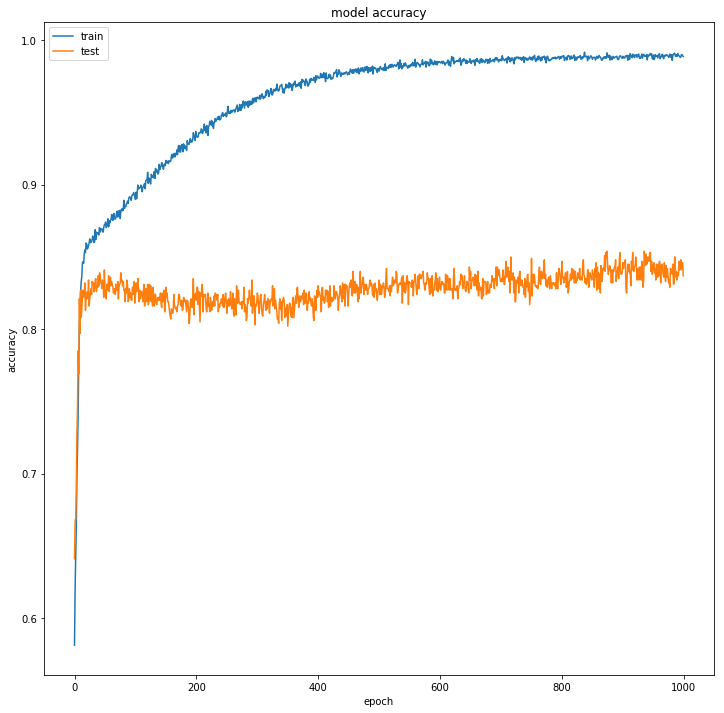

In [74]:
#Lets plot the increase of accuracy as we increase the number of training epochs
#We can see that without any training the acc is about 50%, random guessing
import matplotlib.pyplot as plt
%matplotlib inline
print(history.history.keys())
# summarize history for accuracy
plt.figure(figsize=(12,12))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [75]:
#To load a model that we have already trained and saved:
model.load_weights('Z_chatbot_100_epochs.h5')

In [76]:
#Lets check out the predictions on the test set:
#These are just probabilities for every single word on the vocab
pred_results = model.predict(([inputs_test,questions_test]))

In [79]:
#First test data point
test_data[0]

(['Mary',
  'got',
  'the',
  'milk',
  'there',
  '.',
  'John',
  'moved',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Is', 'John', 'in', 'the', 'kitchen', '?'],
 'no')

In [77]:
#These are the probabilities for the vocab words using the 1st sentence
pred_results[0]

array([2.4758190e-21, 2.1397022e-21, 2.2722944e-21, 1.9776182e-21,
       1.7983421e-21, 1.9400778e-21, 1.6792089e-21, 2.0177312e-21,
       2.2013671e-21, 2.1278508e-21, 1.8952951e-21, 1.9446645e-21,
       2.1805394e-21, 2.1526293e-21, 2.1304580e-21, 2.4526099e-21,
       1.9765925e-21, 1.8287746e-21, 2.2381072e-21, 1.0000000e+00,
       2.3029066e-21, 2.1592005e-21, 2.5348889e-21, 1.8851353e-21,
       1.8703010e-21, 2.3107912e-21, 2.3018439e-21, 2.2044449e-19,
       2.0388772e-21, 2.3365857e-21, 2.1607000e-21, 1.9910922e-21,
       2.3918412e-21, 2.1491505e-21, 1.7650330e-21, 2.4313060e-21,
       2.0611253e-21, 2.2488391e-21], dtype=float32)

In [78]:
val_max = np.argmax(pred_results[0])

In [81]:
for key,val in tokenizer.word_index.items():
    if val == val_max:
        k = key
print(k)

no


In [82]:
#See probability:
pred_results[0][val_max]

1.0

In [83]:
#Now, we can make our own questions using the vocabulary we have
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [84]:
my_story = 'Sandra picked up the milk . Mary travelled left . '

In [85]:
my_story.split()

['Sandra', 'picked', 'up', 'the', 'milk', '.', 'Mary', 'travelled', 'left']

In [86]:
my_question = 'Sandra got the milk ?'

In [87]:
my_question.split()

['Sandra', 'got', 'the', 'milk', '?']

In [88]:
#Put the data in the same format as before
my_data = [(my_story.split(), my_question.split(),'yes')]

In [89]:
#Vectorize this data
my_story, my_ques, my_ans = vectorize_stories(my_data)

In [90]:
#Make the prediction
pred_results = model.predict(([my_story,my_ques]))

In [92]:
val_max = np.argmax(pred_results[0])

In [93]:
#Correct prediction!
for key,val in tokenizer.word_index.items():
    if val == val_max:
        k = key
print(k)

yes


In [94]:
#Confidence
pred_results[0][val_max]

0.9867547